# The random module

The random module is used to select a pseudo random from a collection such as a list or an underlying distribution.

It can be imported using:

In [1]:
import random
import math

The math module is also imported.

Details about the module can be seen by looking up its help:

In [2]:
help(random)

Help on module random:

NAME
    random - Random variable generators.

MODULE REFERENCE
    https://docs.python.org/3.11/library/random.html
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
        bytes
        -----
               uniform bytes (values between 0 and 255)
    
        integers
        --------
               uniform within range
    
        sequences
        ---------
               pick random element
               pick random sample
               pick weighted random sample
               generate random permutation
    
        distributions on the real line:
        ------------------------------
               uniform
               triangular
               normal (Gaussian)


The random modules identifiers can be accessed using:

In [3]:
# random.

In [4]:
print(dir(random), end=' ')

['BPF', 'LOG4', 'NV_MAGICCONST', 'RECIP_BPF', 'Random', 'SG_MAGICCONST', 'SystemRandom', 'TWOPI', '_ONE', '_Sequence', '_Set', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_accumulate', '_acos', '_bisect', '_ceil', '_cos', '_e', '_exp', '_floor', '_index', '_inst', '_isfinite', '_log', '_os', '_pi', '_random', '_repeat', '_sha512', '_sin', '_sqrt', '_test', '_test_generator', '_urandom', '_warn', 'betavariate', 'choice', 'choices', 'expovariate', 'gammavariate', 'gauss', 'getrandbits', 'getstate', 'lognormvariate', 'normalvariate', 'paretovariate', 'randbytes', 'randint', 'random', 'randrange', 'sample', 'seed', 'setstate', 'shuffle', 'triangular', 'uniform', 'vonmisesvariate', 'weibullvariate'] 

These can be grouped into constants:

In [5]:
for identifier in dir(random):
    isfunction = callable(getattr(random, identifier))
    isdatamodel = identifier[0] == '_'
    if (not isfunction and not isdatamodel):
        print(identifier, end=' ')

BPF LOG4 NV_MAGICCONST RECIP_BPF SG_MAGICCONST TWOPI 

Functions:

In [6]:
for identifier in dir(random):
    isfunction = callable(getattr(random, identifier))
    isclass = type(getattr(random, identifier)) == type
    isdatamodel = identifier[0] == '_'
    if (isfunction and not isclass and not isdatamodel):
        print(identifier, end=' ')

betavariate choice choices expovariate gammavariate gauss getrandbits getstate lognormvariate normalvariate paretovariate randbytes randint random randrange sample seed setstate shuffle triangular uniform vonmisesvariate weibullvariate 

Classes:

In [7]:
for identifier in dir(random):
    isfunction = callable(getattr(random, identifier))
    isclass = type(getattr(random, identifier)) == type
    isdatamodel = identifier[0] == '_'
    if (isfunction and isclass and not isdatamodel):
        print(identifier, end=' ')

Random SystemRandom 

Data Model Attributes:

In [8]:
for identifier in dir(random):
    isfunction = callable(getattr(random, identifier))
    isdatamodel = identifier[0:2] == '__'
    if (not isfunction and isdatamodel):
        print(identifier, end=' ')

__all__ __builtins__ __cached__ __doc__ __file__ __loader__ __name__ __package__ __spec__ 

Internal Attributes:

In [9]:
for identifier in dir(random):
    isfunction = callable(getattr(random, identifier))
    isdatamodel = identifier[0] == '_' and identifier[1] != '_'
    if (not isfunction and isdatamodel):
        print(identifier, end=' ')

_ONE _e _inst _os _pi _random 

Internal Methods:

In [10]:
for identifier in dir(random):
    isfunction = callable(getattr(random, identifier))
    isdatamodel = identifier[0] == '_' and identifier[1] != '_'
    if (isfunction and isdatamodel):
        print(identifier, end=' ')

_Sequence _Set _accumulate _acos _bisect _ceil _cos _exp _floor _index _isfinite _log _repeat _sha512 _sin _sqrt _test _test_generator _urandom _warn 

The most commonly used component of the module is the functions for random number generation. Constants are capitalised SNAKE_CASE and are typically used as default values for input arguments in functions. 

The data model attributes are the data model attributes available for all modules, giving details about the module. The internal methods and internal attributes are not directly used by the end user. 

The classes can be used to create a seperate instance that has access to all the functions as methods and has its own independent state.

## Seed and State

One thing to note about the random module is the random selection is randomly computer generated and is not really random. This is known as pseudo-random. The pseudo random result can be reproduced by setting random.seed:

In [11]:
? random.seed

Signature:  random.seed(a=None, version=2)
Docstring:
Initialize internal state from a seed.

The only supported seed types are None, int, float,
str, bytes, and bytearray.

None or no argument seeds from current time or from an operating
system specific randomness source if available.

If *a* is an int, all bits are used.

For version 2 (the default), all of the bits are used if *a* is a str,
bytes, or bytearray.  For version 1 (provided for reproducing random
sequences from older versions of Python), the algorithm for str and
bytes generates a narrower range of seeds.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

Under the hood the random seed sets up a sequence of integers which correspond to random states and more details about these can be found using random.getstate:

In [12]:
? random.getstate

Signature:  random.getstate()
Docstring: Return internal state; can be passed to setstate() later.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

To return to a state, setstate can be used:

In [13]:
? random.setstate

Signature:  random.setstate(state)
Docstring: Restore internal state from object returned by getstate().
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

The simple list nums can be created. The seed set to 0 and three individual choices made using choice four times:

In [14]:
nums = [1, 3, 5, 7, 9]

In [15]:
random.seed(0)

In [16]:
random.choice(nums)

7

In [17]:
random.choice(nums)

7

In [18]:
random.choice(nums)

1

If the seed is reset to 0 and another three choices are made, these will be the same three choices as before:

In [19]:
random.seed(0)

In [20]:
random.choice(nums)

7

In [21]:
random.choice(nums)

7

In [22]:
random.choice(nums)

1

The current state can be retrieved and assigned to a variable. Notice if another three random choices are made after getting the state, that these are different to before:

In [23]:
state = random.getstate()

In [24]:
random.choice(nums)

5

In [25]:
random.choice(nums)

9

In [26]:
random.choice(nums)

7

This state can be restored from the variable and if the three random choices are made, they will be the the same as before:

In [27]:
random.setstate(state)

In [28]:
random.choice(nums)

5

In [29]:
random.choice(nums)

9

In [30]:
random.choice(nums)

7

If the seed is changed, a different set of random states are obtained:

In [31]:
random.seed(1)

In [32]:
random.choice(nums)

3

In [33]:
random.choice(nums)

9

Under the hood, the seed generates a large tuple where each element in the tuple is a random sequence of 4 bytes which are used by the functions to generate a corresponding *random* number. The first five of these can be seen for a seed of 0:

In [34]:
random.seed(0)
random.getstate()[1][:5]

(2147483648, 766982754, 497961170, 3952298588, 2331775348)

This can be seen in hex using:

In [35]:
random.seed(0)
tuple(map(hex, random.getstate()[1][:5]))

('0x80000000', '0x2db73a62', '0x1dae48d2', '0xeb934a5c', '0x8afc1174')

In [36]:
random.seed(1)
tuple(map(hex, random.getstate()[1][:5]))

('0x80000000', '0x9c07f18', '0xcb84719c', '0xcbce73c', '0xf4d8b2a4')

In [37]:
random.seed(3)
tuple(map(hex, random.getstate()[1][:5]))

('0x80000000', '0x1e446e26', '0x28bcab61', '0x1280edb4', '0x9aced48a')

Notice that the first element is constant and is used to indicate the version and is not used for random number generation itself.

To recap the seed is the value used to initialise the generator and the state is the current state of the generator after each call to generate a random number. 

## Choice

random.choice can be used to make a pseudo random choice from a sequence, such as a list:

In [38]:
? random.choice

Signature:  random.choice(seq)
Docstring: Choose a random element from a non-empty sequence.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

For example:

In [39]:
random.seed(0)

In [40]:
nums = [1, 3, 5, 7, 9]

In [41]:
random.choice(nums)

7

In [42]:
random.choice(nums)

7

In [43]:
random.choice(nums)

1

In [44]:
random.choice(nums)

5

Notice that the same value in the sequence can be selected multiple times.

## Choices

random.choices can be used to make multiple choices from a population, the number of choices is determined by specifying the keyword argument k which has a default value of 1 and therefore behaves similar to  choice by default:

In [45]:
? random.choices

Signature:  random.choices(population, weights=None, *, cum_weights=None, k=1)
Docstring:
Return a k sized list of population elements chosen with replacement.

If the relative weights or cumulative weights are not specified,
the selections are made with equal probability.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

For example:

In [46]:
random.seed(0)

In [47]:
nums = [1, 3, 5, 7, 9]

If k is unspecified it uses a default value of 1 and behaves similarly to random.choice:

In [48]:
random.choices(nums)

[9]

In [49]:
random.choices(nums)

[7]

In [50]:
random.choices(nums)

[5]

Notice the output is a list with a single element. This is because choices is usually used to select multiple choices from a population. Let's assign k=3 to make 3 choices:

In [51]:
random.seed(0)

In [52]:
random.choices(nums, k=3)

[9, 7, 5]

In [53]:
random.choices(nums, k=3)

[3, 5, 5]

random.choices also makes choices from the population with replacement. With replacement means that once a choice is made, it is still present in the population. In the above example 5 was chosen twice.

It is therefore possible to make 10 choices from a list that has 5 items:

In [54]:
random.choices(nums, k=10)

[7, 3, 5, 5, 9, 5, 3, 7, 7, 3]

Notice the same value 7 is choosen multiple times.

The population above was assumed to be uniformly distributed i.e. each value has the same weight or the same chance of occuring.

Each value can be weighted, using the keyword argument weights and assigning it to a list of respective weights for each value in the population. For example:

In [55]:
nums = [1, 3, 5, 7, 9]
weights = [5, 2, 1, 1, 1]

In [56]:
random.choices(nums, weights=weights, k=20)

[9, 9, 7, 9, 1, 5, 7, 3, 1, 1, 1, 3, 9, 9, 1, 7, 1, 7, 3, 1]

In the example above the weights are selected so they sum to 10. The weight of 1 is $\frac{5}{10}$ and therefore out of the 20 choices approximately $20\times\frac{5}{10}$ of them should be 1. This ratio becomes more apparent when a larger number of choices are made. For convenience the list output from k=10000 can be used with the Counter class to return the counts for each value:

In [57]:
from collections import Counter
Counter(random.choices(nums, weights=weights, k=10000))

Counter({1: 4980, 3: 2022, 7: 1048, 5: 997, 9: 953})

The ratios returned are approximately equivalent to the weights as expected.

Cumulative weights can also be used. The cumulative weight is the cumulative weight of all previous elements plus the new weight of the current element:

In [58]:
weights = [5, 2, 1, 1, 1]
scalar = 0

In [59]:
cumweights = [scalar := scalar + weight for weight in weights]
cumweights

[5, 7, 8, 9, 10]

The := operator allows assignment of the variable scalar within an expression. 

Once the cumulative weights are obtained, they can be used with the named keyword input argument cum_weights and a similar ratio is obtained in the counter instance as before:


In [60]:
Counter(random.choices(nums, cum_weights=cumweights, k=10000))

Counter({1: 4947, 3: 2036, 5: 1035, 9: 1032, 7: 950})

## Sample

random.sample can be used to take a sample of k values from a population. Unlike choices the values taken for the sample are taken without replacement.

In [61]:
? random.sample

Signature:  random.sample(population, k, *, counts=None)
Docstring:
Chooses k unique random elements from a population sequence.

Returns a new list containing elements from the population while
leaving the original population unchanged.  The resulting list is
in selection order so that all sub-slices will also be valid random
samples.  This allows raffle winners (the sample) to be partitioned
into grand prize and second place winners (the subslices).

Members of the population need not be hashable or unique.  If the
population contains repeats, then each occurrence is a possible
selection in the sample.

Repeated elements can be specified one at a time or with the optional
counts parameter.  For example:

    sample(['red', 'blue'], counts=[4, 2], k=5)

is equivalent to:

    sample(['red', 'red', 'red', 'red', 'blue', 'blue'], k=5)

To choose a sample from a range of integers, use range() for the
population argument.  This is especially fast and space efficient
for sampling from a la

For a population of 5 items where each item has a single count. A sample of 3 values can be taken. Or a sample of 5 items can be taken. In the latter case, a sample of all the items is taken and the list is essentially shuffled.

In [62]:
nums = [1, 3, 5, 7, 9]

In [63]:
random.sample(nums, k=3)

[1, 3, 7]

In [64]:
random.sample(nums, k=5)

[1, 5, 7, 9, 3]

If 6 items are attempted to be taken in a sample of only 5 items, there is a ValueError:

In [65]:
# random.sample(nums, k=6)

<span style="color:red">ValueError</span>: Sample larger than population or is negative

The counts can be assigned to values which matched the previously used weights:

In [66]:
nums = [1, 3, 5, 7, 9]
counts = [5, 2, 1, 1, 1]

Since counts has a sum of 10, there are 10 values in the full sample. This means there are 5 occurances of 1, 2 occurances of 3, 1 occurance of 5, 1 occurance of 7 and 1 occurance of 9. This can be seen when a full sample is taken and when a counter is used:

In [67]:
full_sample = random.sample(nums, counts=counts, k=10)
full_sample

[1, 9, 1, 3, 5, 1, 1, 3, 7, 1]

In [68]:
Counter(full_sample)

Counter({1: 5, 3: 2, 9: 1, 5: 1, 7: 1})

Generally a number of smaller sample is taken from a larger dataset:

In [69]:
sample1 = random.sample(nums, counts=counts, k=3)
sample1

[3, 1, 9]

## Shuffle

The random.shuffle function takes in a list of values and mutates it its order in place. 

In [70]:
? random.shuffle

Signature:  random.shuffle(x)
Docstring: Shuffle list x in place, and return None.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

In [71]:
nums = [1, 3, 5, 7, 9]

In [72]:
random.shuffle(nums) # No return value

In [73]:
nums # Nums mutated

[1, 3, 9, 5, 7]

This is similar to taking a sample of all the items in the list for a list where every item has a count of 1 but sample outputs a new list while shuffle mutates the original in place:

In [74]:
nums = [1, 3, 5, 7, 9]

In [75]:
random.sample(nums, k=len(nums)) # Return value

[7, 3, 9, 1, 5]

In [76]:
nums # Not mutated

[1, 3, 5, 7, 9]

## Random Integer

The random.randint function is used to return a random integer between a specified lower bound and upper bound of integers, inclusive of both bounds. All of the integers in the range are uniformly distributed, meaning no weighting is carried out in the distribution:

In [77]:
? random.randint

Signature:  random.randint(a, b)
Docstring:
Return random integer in range [a, b], including both end points.
        
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

In [78]:
random.randint(0, 10) # inclusive both bounds

7

It is equivalent to taking a choice from a range object which has a step of 1:

In [79]:
random.choice(range(0, 11, 1)) # exclusive of stop bound

4

Recall that the range object is exclusive of the upper bound, which is why the end is one higher.

## Get Random Bits

The random.getrandbits will generate a random configuration of bits:

In [80]:
? random.getrandbits

Signature:  random.getrandbits(k, /)
Docstring: getrandbits(k) -> x.  Generates an int with k random bits.
Type:      builtin_function_or_method

In [81]:
random.seed(0)

Recall that a single bit can have a value of 0 or 1:

In [82]:
bit1 = random.getrandbits(1)

In [83]:
bit2 = random.getrandbits(1)

And can be represented in binary as:

In [84]:
bin(bit1)

'0b1'

In [85]:
bin(bit2)

'0b0'

Recall that 8 bits are used in a byte. Therefore a random byte can be generated:

In [86]:
byte1 = random.getrandbits(8)
byte2 = random.getrandbits(8)
byte3 = random.getrandbits(8)

In [87]:
bin(byte1)

'0b11000010'

To ensure this shows using 8 bits:

In [88]:
'0b' + bin(byte1).removeprefix('0b').zfill(8)

'0b11000010'

In [89]:
'0b' + bin(byte2).removeprefix('0b').zfill(8)

'0b11100011'

In [90]:
'0b' + bin(byte3).removeprefix('0b').zfill(8)

'0b01101011'

Recall that every 4 bits (half a byte) can be displayed as a hexadecimal character. Therefore this sequence can be shown as:

In [91]:
hex(byte1)

'0xc2'

In [92]:
hex(byte2)

'0xe3'

In [93]:
hex(byte3)

'0x6b'

Since these are bytes they can be inserted into a byte strign as escape characters. If the byte is in the range 0-127, it will be inserted as an ASCII chracter:

In [94]:
b'\xc2'

b'\xc2'

In [95]:
b'\xe3'

b'\xe3'

In [96]:
b'\x6b'

b'k'

This functions behaviour can be mimicked using random.randint:

## Random Bytes

The associated function random.randbytes will generate a number of random bytes:

In [97]:
? random.randbytes

Signature:  random.randbytes(n)
Docstring: Generate n random bytes.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

In [98]:
random.seed(0)

In [99]:
byte1 = random.randbytes(1)

In [100]:
byte1

b'\xd8'

In [101]:
byte1.hex()

'd8'

In [102]:
byte2 = random.randbytes(4)

In [103]:
byte2

b'\xbeo\x9fb'

In [104]:
byte2.hex()

'be6f9f62'

The functions behaviour can be mimicked with random.randint:

## The uniform Distribution

The random.uniform function is used to generate a random float in a uniform distribution with the range a to b:

In [105]:
? random.uniform

Signature:  random.uniform(a, b)
Docstring: Get a random number in the range [a, b) or [a, b] depending on rounding.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

In [106]:
random.uniform(a=0, b=10)

7.579544029403024

Except for the case where weights or counts were manually specified, all the data seen so far is uniformly distributed meaning each value has the same weight. It is useful to conceptualise what the uniform distribution looks like in the form of a histogram of 100000 values. A uniform distribution has an equal weighting for each value and looks like the following:

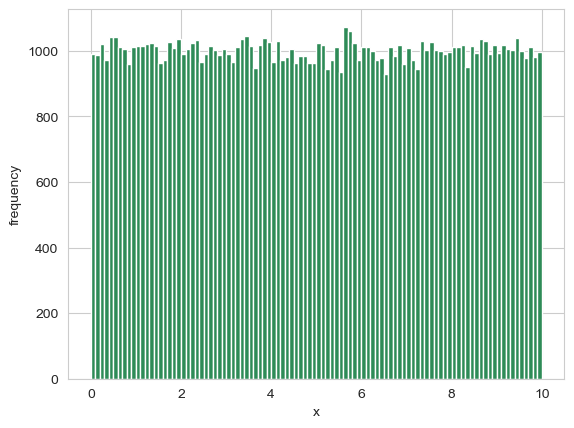

In [107]:
from plotting import plot1
plot1();

## The Triangular Distribution

The random.triangle function is used to generate a random float from a triangular distribution in the range low to high:

In [108]:
? random.triangular

Signature:  random.triangular(low=0.0, high=1.0, mode=None)
Docstring:
Triangular distribution.

Continuous distribution bounded by given lower and upper limits,
and having a given mode value in-between.

http://en.wikipedia.org/wiki/Triangular_distribution
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

A triangular distribution has similar input arguments to a uniform distribution but the underlying distribution is different in the shape of a triangle. The peak of the triangle is in the centre of the selected range and falls to zero at the edges:

In [109]:
random.triangular(low=0, high=10)

6.631239008671744

A triangular histogram of 100000 values depicts the triangular distribution:

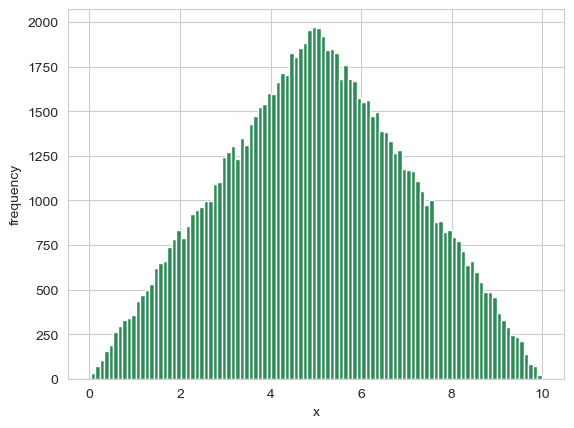

In [110]:
from plotting import plot2
plot2();

## The Normal Distribution

The Normal Distribution also known as a Gaussian Distribution is centred around a mean mu and distributed using a standard deviation sigma. There are two functions random.gauss and random.normalvariate which take in the same input arguments. Both of these generate a floating point number from a normal distribution of a specified mu and sigma value:

In [111]:
? random.gauss

Signature:  random.gauss(mu=0.0, sigma=1.0)
Docstring:
Gaussian distribution.

mu is the mean, and sigma is the standard deviation.  This is
slightly faster than the normalvariate() function.

Not thread-safe without a lock around calls.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

In [112]:
? random.normalvariate

Signature:  random.normalvariate(mu=0.0, sigma=1.0)
Docstring:
Normal distribution.

mu is the mean, and sigma is the standard deviation.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

The gauss distribution will be used to select a random point from a Gaussian distribution with a mean mu of 0 and a standard deviation of 1, this is known as the Standard Normal Distribution:

In [113]:
random.gauss(mu=0, sigma=1)

2.339996853028369

A Gaussian histogram of 100000 values with a mean mu=0 and standard deviation sigma=1 looks like:

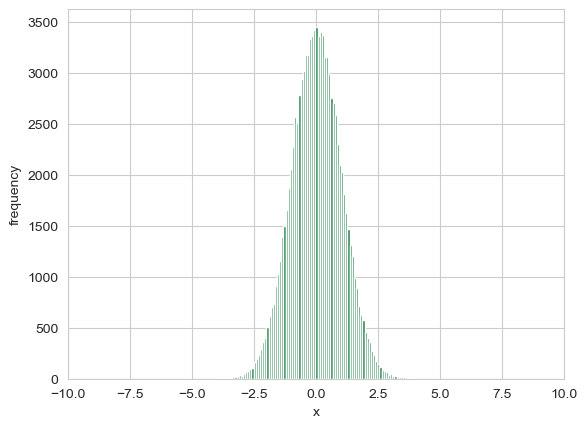

In [114]:
from plotting import plot3
plot3();

The effect of increasing the standard deviation sigma=2 or sigma=3 can be seen to widen the distribution:

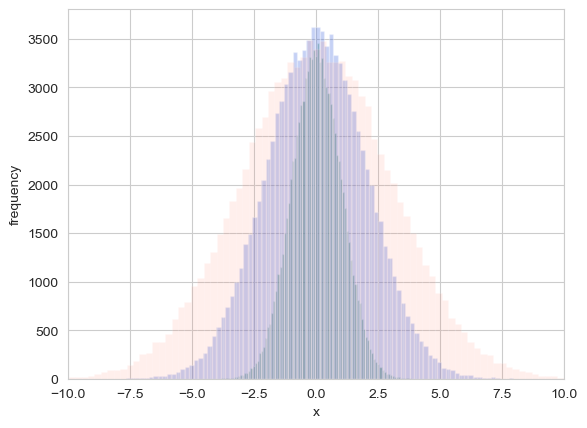

In [115]:
from plotting import plot4
plot4();

## The Exponential Normal Distribution

The function random.lognormvariate is used to generate an Exponential of a Normal Distribution... 

The name "Log Normal Variate" means "The Log of this Variate gives the Normal Distribution" and **not** the Log of the Normal Distribution.

This function also takes in an input argument mu for the mean and sigma for the standard deviation:

In [116]:
? random.lognormvariate

Signature:  random.lognormvariate(mu, sigma)
Docstring:
Log normal distribution.

If you take the natural logarithm of this distribution, you'll get a
normal distribution with mean mu and standard deviation sigma.
mu can have any value, and sigma must be greater than zero.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

It can be tested with mu=0 and sigma=1:

In [117]:
random.lognormvariate(mu=0, sigma=1)

0.7398408957344274

A Log Normal histogram of 100000 values with a mean mu=0 and standard deviation sigma=1 looks like:

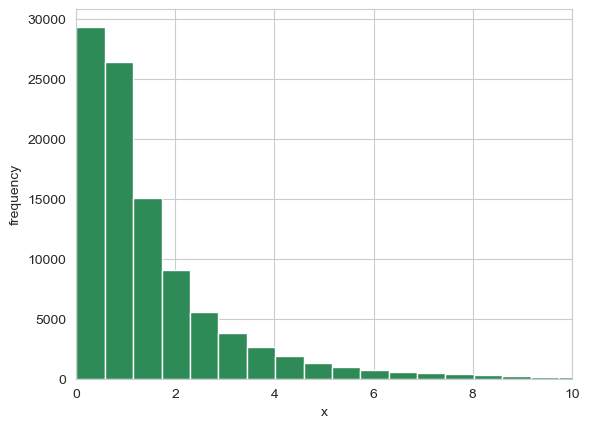

In [118]:
from plotting import plot5
plot5();

This is equivalent to:

And therefore taking a log of it returns the normal distribution:

## The Exponential Distribution

The function random.expovariate generates a floating point number from an exponential distribution centred around the inverse of the parameter lambd:

In [119]:
? random.expovariate

Signature:  random.expovariate(lambd)
Docstring:
Exponential distribution.

lambd is 1.0 divided by the desired mean.  It should be
nonzero.  (The parameter would be called "lambda", but that is
a reserved word in Python.)  Returned values range from 0 to
positive infinity if lambd is positive, and from negative
infinity to 0 if lambd is negative.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

This single value is near the value 5 which is the inverse of lambd:

In [120]:
random.expovariate(lambd=1/5)

5.10436754491967

A plot of 100000 values looks as follows:

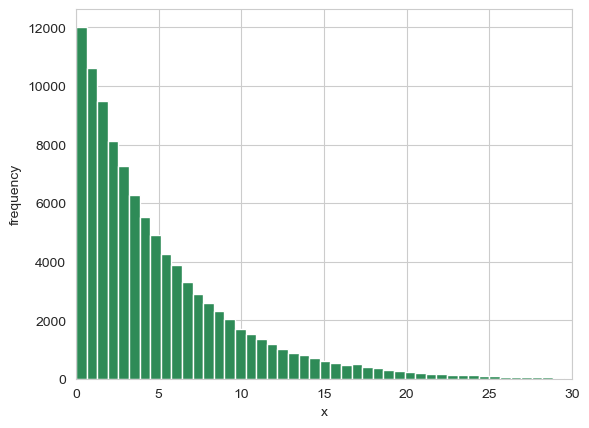

In [121]:
from plotting import plot6
plot6();

Because the value is falling as x increases, this is known as a negative exponential.

The effect of changing sign can be seen giving a distribution that is mirrored in x about the origin:

In [122]:
random.expovariate(lambd=-1/5)

-0.05053292246032406

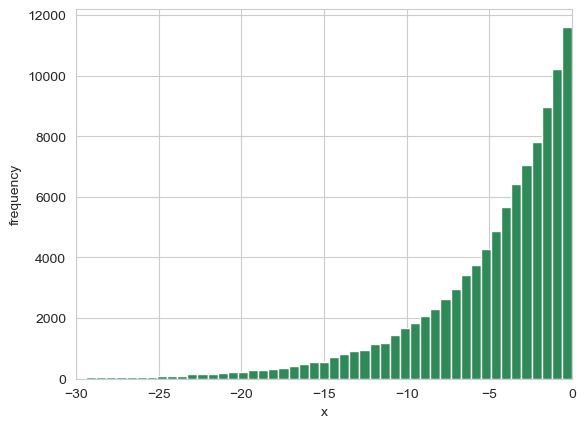

In [123]:
from plotting import plot7
plot7();

## The Gamma Distribution

The function random.gammavariate is used to generate a random float from a gamma distribution. The gamma distribution takes in two input arguments alpha and beta:

In [124]:
? random.gammavariate

Signature:  random.gammavariate(alpha, beta)
Docstring:
Gamma distribution.  Not the gamma function!

Conditions on the parameters are alpha > 0 and beta > 0.

The probability distribution function is:

            x ** (alpha - 1) * math.exp(-x / beta)
  pdf(x) =  --------------------------------------
              math.gamma(alpha) * beta ** alpha
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

If alpha=1, then this becomes the Negative Exponential distribution. This can be seen by setting beta=5:

In [125]:
random.gammavariate(alpha=1, beta=5)

8.935981466185574

A plot of 100000 values looks as follows which is the same as the Negative Exponential distribution:

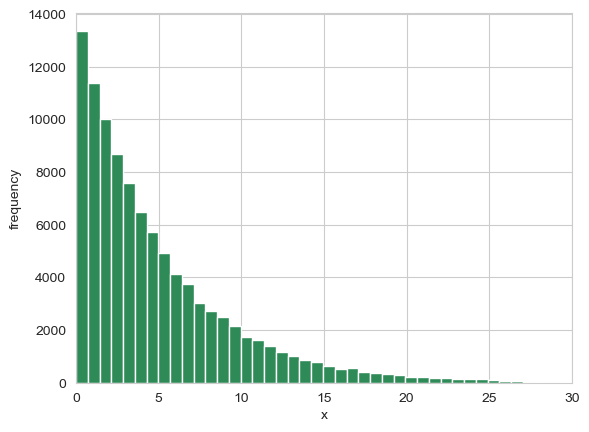

In [126]:
from plotting import plot8
plot8();

If alpha=2, the distribution begins to change towards a bell shape:

In [127]:
random.gammavariate(alpha=2, beta=5)

9.29756489658226

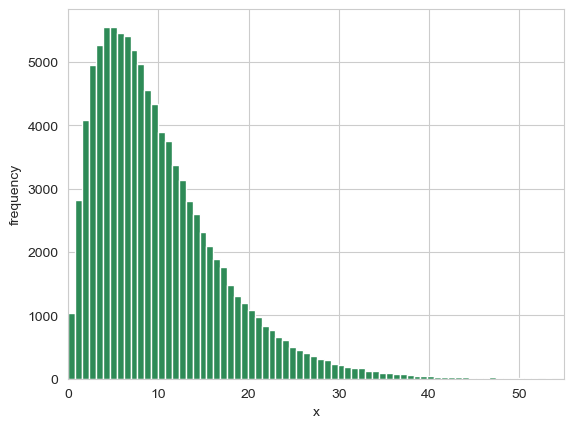

In [128]:
from plotting import plot9
plot9();

This trend continues with alpha=3:

In [129]:
random.gammavariate(alpha=3, beta=5)

6.029003508461114

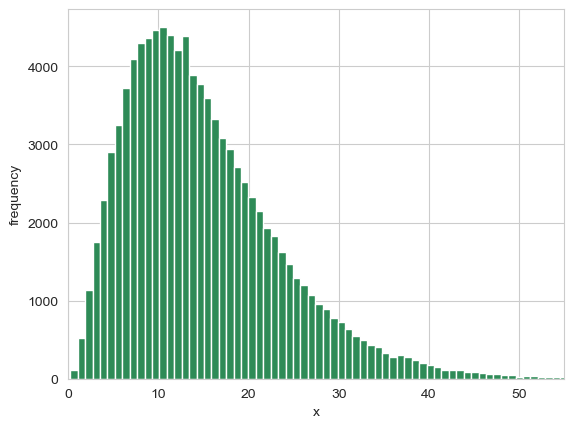

In [130]:
from plotting import plot10
plot10();

At a very large value alpha=100000. The plot is dominated by the bell shape with a mean of 500000 which is the product of alpha and beta:

In [131]:
random.gammavariate(alpha=100000, beta=5)

500431.8226358013

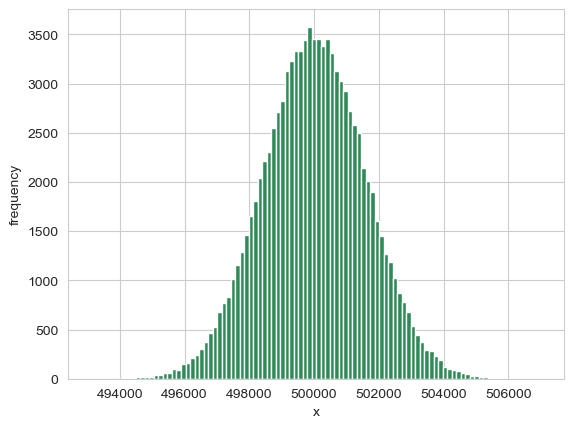

In [132]:
from plotting import plot11
plot11();

## The Beta Distribution

The random.betavariate generates a random floating point number from a beta distribution. The Beta distribution also takes in the input arguments alpha and beta:

In [133]:
? random.betavariate

Signature:  random.betavariate(alpha, beta)
Docstring:
Beta distribution.

Conditions on the parameters are alpha > 0 and beta > 0.
Returned values range between 0 and 1.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

Combinations of alpha and beta create distributions similar in form to those previously explored. For example alpha=1 and beta=1 gives a distribution similar to a random uniform distribution:

In [134]:
random.betavariate(alpha=1, beta=1)

0.5733338617152481

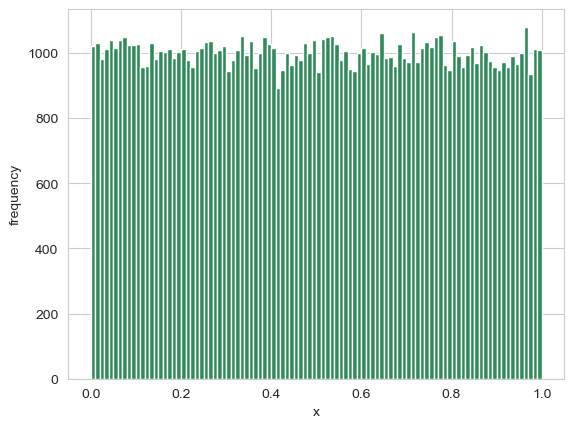

In [135]:
from plotting import plot12
plot12();

alpha=5 and beta=1 gives a distribution similar to a positive exponential distribution:

In [136]:
random.betavariate(alpha=5, beta=1)

0.8414671744194594

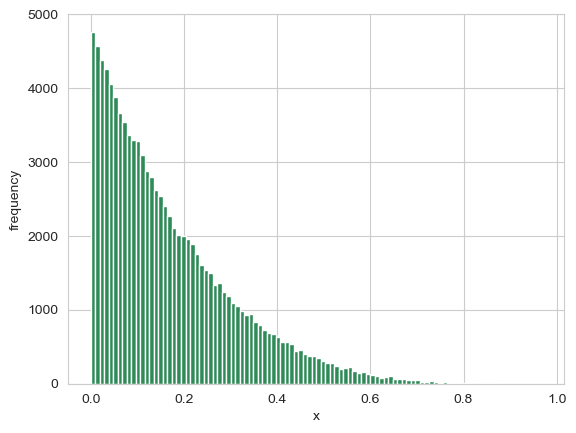

In [137]:
from plotting import plot13
plot13();

alpha=5 and beta=5 gives a distribution similar to a Gaussian bell shape distribution:

In [138]:
random.betavariate(alpha=5, beta=5)

0.5268733854639135

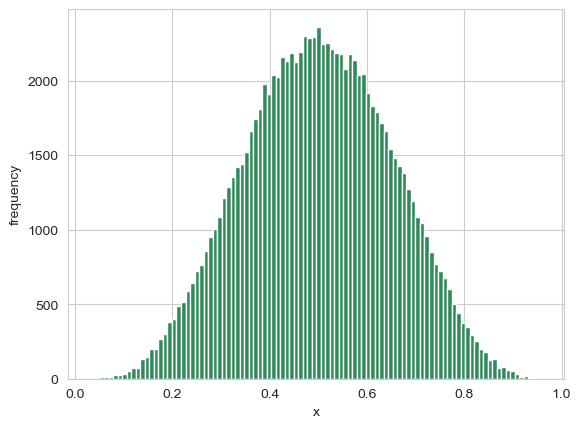

In [139]:
from plotting import plot14
plot14();

## The Pareto Distribution

The random.paretovariate generates a random floating point number from a Pareto distribution. The Parento distribution is a power law probability statistical distribution with a sharp probability peak and symmetric long probability tail. It was originally used by Pareto to model the distribution of wealth per percentile population, where it was found that 20 % of the population held 80 % of the wealth:

In [140]:
? random.paretovariate

Signature:  random.paretovariate(alpha)
Docstring: Pareto distribution.  alpha is the shape parameter.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

It has a shape parameter alpha which was empirically calculated to be $\log_4{(5)}=1.161$ for the so called 80-20 rule. 

In [141]:
random.paretovariate(alpha=1.161)

1.1171240737945218

A histogram of 100 random values looks like:

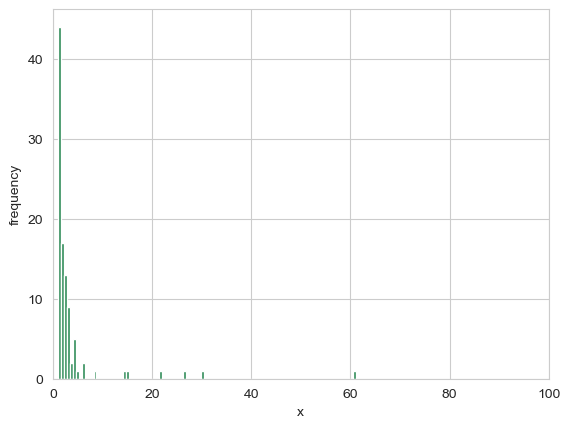

In [142]:
from plotting import plot15
plot15();

## The Weibull Distribution

The random.weibullvariate generates a random floating point number from a Weibull distribution. The Weibull distribution has a scale parameter alpha and a shape parameter beta:

In [143]:
? random.weibullvariate

Signature:  random.weibullvariate(alpha, beta)
Docstring:
Weibull distribution.

alpha is the scale parameter and beta is the shape parameter.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

The influence of the shape parameter beta can be seen by leaving alpha assigned to 1.

alpha=1, beta=0.5 is similar to a Pareto distribution:

In [144]:
random.weibullvariate(alpha=1, beta=0.5)

0.027387123143354005

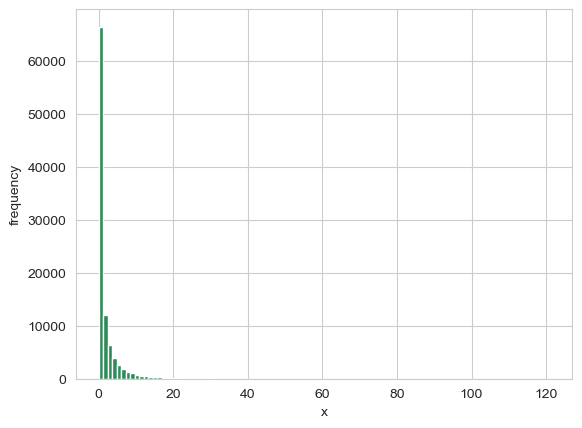

In [145]:
from plotting import plot16
plot16();

alpha=1, beta=1 move towards a negative exponential distribution:

In [146]:
random.weibullvariate(alpha=1, beta=1)

1.687391077508375

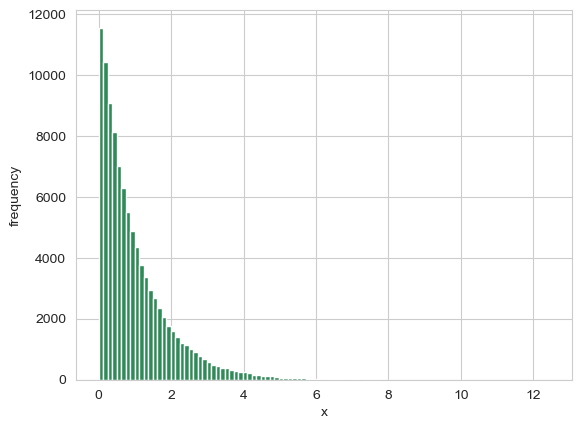

In [147]:
from plotting import plot17
plot17();

alpha=1, beta=2 begins to move towards the normal distribution:

In [148]:
random.weibullvariate(alpha=1, beta=2)

0.8549735692130896

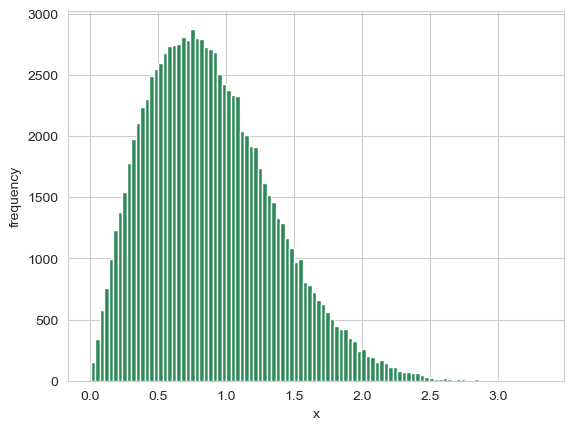

In [149]:
from plotting import plot18
plot18();

alpha=1, beta=3 is more similar to the normal distribution:

In [150]:
random.weibullvariate(alpha=1, beta=3)

0.5107159725633745

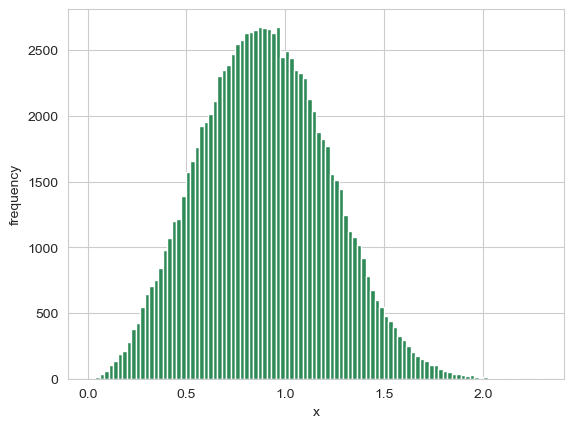

In [151]:
from plotting import plot19
plot19();

The effect of changing the scale parameter alpha can be seen by setting beta=3:

In [152]:
random.weibullvariate(alpha=1, beta=3)

0.9314370870686038

In [153]:
random.weibullvariate(alpha=2, beta=3)

2.059171450529151

In [154]:
random.weibullvariate(alpha=3, beta=3)

3.168169658465334

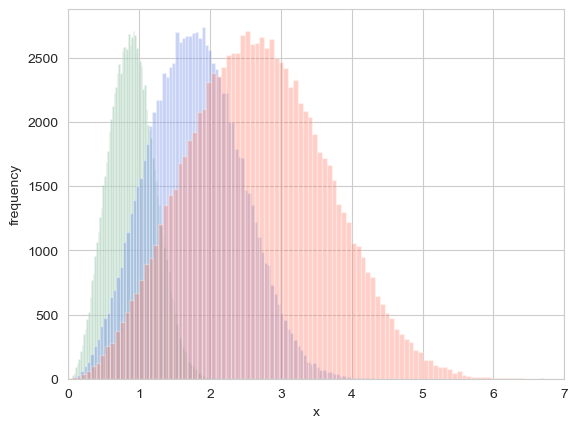

In [155]:
from plotting import plot20
plot20();

## The Vonmises Distribution

The random.vonmisesvariate generates a random floating point number from a Vonmises distribution. The Vonmises Distribution is a circular data distribution. It has two input arguments, the angle mu and the concentration parameter kappa:

In [156]:
? random.vonmisesvariate

Signature:  random.vonmisesvariate(mu, kappa)
Docstring:
Circular data distribution.

mu is the mean angle, expressed in radians between 0 and 2*pi, and
kappa is the concentration parameter, which must be greater than or
equal to zero.  If kappa is equal to zero, this distribution reduces
to a uniform random angle over the range 0 to 2*pi.
File:      c:\users\pyip\appdata\local\mambaforge\envs\jupyterlab\lib\random.py
Type:      method

When kappa=0 the distribution generates a uniform random angle:

In [157]:
random.vonmisesvariate(mu=math.tau/4, kappa=0)

4.223190598575964

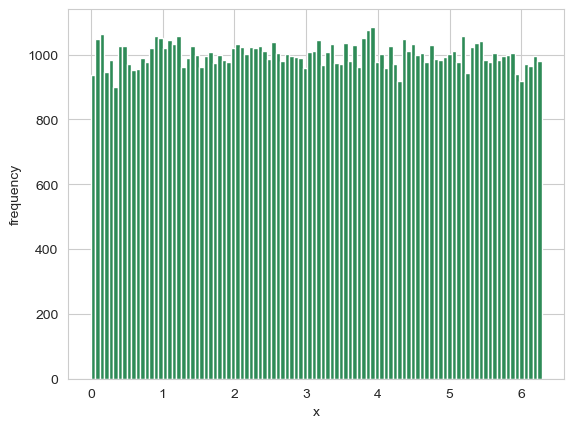

In [158]:
from plotting import plot21
plot21();

In [159]:
nums = [random.vonmisesvariate(mu=math.tau/4, kappa=0)
        for 
        num 
        in 
        range(100000)]

In [160]:
import numpy as np
counts, angles = np.histogram(nums, bins=100)

TypeError: 'float' object cannot be interpreted as an integer

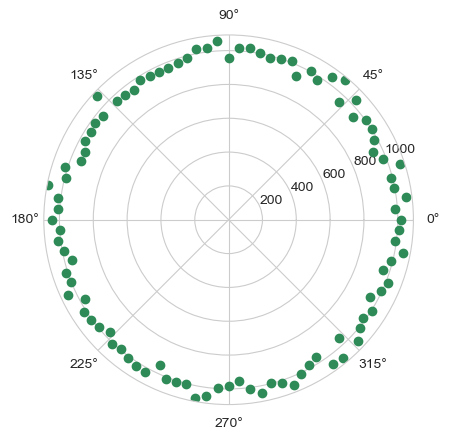

In [161]:
from plotting import plot22
plot22();